Yazan Bawaqna

CS 251/2: Data Analysis and Visualization

Spring 2025

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans


plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 4 | Clustering

## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a. Import and plot `cluster2` data

In the cell below, use load in the `cluster2.csv` dataset (25 x,y values). Convert it (if necessary) to a ndarray with shape `(25, 2)`.

**NOTE:** You can either use your `Data` class to do this or NumPy (*see your recent labs if you need a refresher on how to load in a CSV file with only NumPy* ).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset, skipping the first row (header)
data = np.genfromtxt('data/cluster2.csv', delimiter=',', skip_header=1)

# Check the shape and first few rows
print("Data shape:", data.shape)  # Should be (25, 2)
print("First 5 rows:\n", data[:5])



Data shape: (25, 2)
First 5 rows:
 [[-1.2767  4.1072]
 [ 0.4342  3.493 ]
 [-0.5785  3.586 ]
 [-2.0465  3.9456]
 [-0.299   3.0866]]


Create a scatter plot below to see what the data look like.

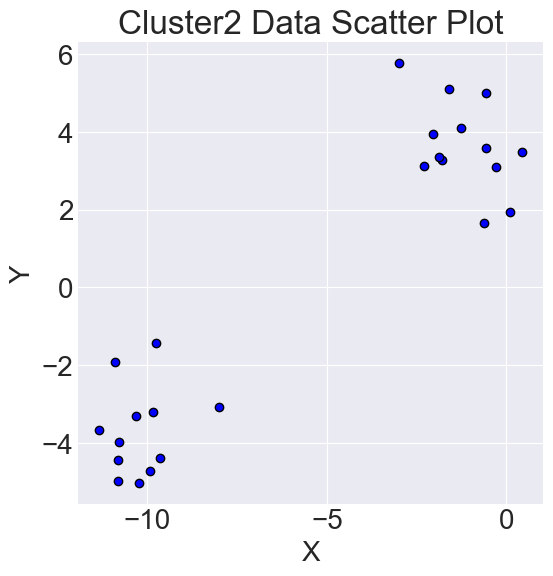

In [10]:

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o', edgecolor='black')

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cluster2 Data Scatter Plot')

plt.show()

### 1b. Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatter plot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `cluster2` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initialize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatter plot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$

for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [14]:
import os

print("Files in data folder:", os.listdir("data"))
cluster = kmeans.KMeans(data)
print(f'Data isnt none? {np.all(cluster.data is not None)}')
print(f'Data num samples isnt None? {np.all(cluster.num_samps is not None)}')
print(f'Data num samples is {cluster.num_samps} and should be 25.')
print(f'Data num features isnt None? {np.all(cluster.num_features is not None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



Files in data folder: ['cluster2.csv', 'cluster5.csv', 'frog.jpg']
Data isnt none? True
Data num samples isnt None? True
Data num samples is 25 and should be 25.
Data num features isnt None? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [15]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [16]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b):.4f}')
print('Correct pt-to-pt distance is 16.4317')

Your pt-to-pt distance is 16.4317
Correct pt-to-pt distance is 16.4317


#### Test `dist_pt_to_centroids`

In [17]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [18]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')
print(f'Initial inertia is:\n{cluster.inertia} and should be inf')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)
Initial inertia is:
inf and should be inf


#### Test `update_labels`

In [19]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.update_labels(init_centroids)
print(f'After the first update data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[1 0 0 1 0 1 1 1 1 1]')

After the first update data label step, 1st 10 of your cluster assignments are:
[1 0 0 1 0 1 1 1 1 1]
Your 1st 10 cluster assignments should be:
[1 0 0 1 0 1 1 1 1 1]


#### Test `update_centroids` (1/2)

In [20]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')
print('\nYou should see:')
print('''After the first centroid update, your cluster assignments are:
[[-0.25525  3.79378]
 [-6.84678 -0.68793]
 [ 0.095    1.9343 ]]
Your difference from previous centroids:
[[-0.59325 -0.67342]
 [-5.00668 -3.80023]
 [-1.6981   1.3916 ]]
''')

After the first centroid update, your cluster assignments are:
[[-0.25525  3.79378]
 [-6.84678 -0.68793]
 [ 0.095    1.9343 ]]
Your difference from previous centroids:
[[-0.59325 -0.67342]
 [-5.00668 -3.80023]
 [-1.6981   1.3916 ]]

You should see:
After the first centroid update, your cluster assignments are:
[[-0.25525  3.79378]
 [-6.84678 -0.68793]
 [ 0.095    1.9343 ]]
Your difference from previous centroids:
[[-0.59325 -0.67342]
 [-5.00668 -3.80023]
 [-1.6981   1.3916 ]]



#### Test `update_centroids` (2/2)

Test special case when no sample gets assigned to one of the clusters.

In [21]:
np.random.seed(0)

print('Test 2: There are 5 clusters, but no samples assigned to 3rd and last cluster.')
print('There should be no Runtime warnings thrown and the centroid arrays should not have any nan values.')
print(100*'-')
test_k_2 = 5
new_labels_2 = new_labels.copy()
new_labels_2[new_labels_2 == 2] = 3
init_centroids_2 = np.vstack([init_centroids, np.random.random(size=(2, 2))])
new_centroids_2, diff_from_prev_centroids_2 = cluster.update_centroids(test_k_2, new_labels_2, init_centroids_2)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids_2}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids_2}')

Test 2: There are 5 clusters, but no samples assigned to 3rd and last cluster.
There should be no Runtime warnings thrown and the centroid arrays should not have any nan values.
----------------------------------------------------------------------------------------------------
After the first centroid update, your cluster assignments are:
[[ -0.25525   3.79378]
 [ -6.84678  -0.68793]
 [ -1.6089    5.1059 ]
 [  0.095     1.9343 ]
 [-10.8032   -3.9685 ]]
Your difference from previous centroids:
[[ -0.59325  -0.67342]
 [ -5.00668  -3.80023]
 [ -3.402     4.5632 ]
 [ -0.45381   1.21911]
 [-11.40596  -4.51338]]


You should see: 
    
    After the first centroid update, your cluster assignments are:
    [[ -0.25525   3.79378]
    [ -6.84678  -0.68793]
    [some_float  some_float ]
    [  0.095     1.9343 ]
    [some_float  some_float ]]
    Your difference from previous centroids:
    [[ -0.59325  -0.67342]
    [ -5.00668  -3.80023]
    [some_float  some_float ]
    [ -0.45381   1.21911]
    [some_float  some_float]]

**NOTE:** Each `some_float` above should be a different random float value and not `nan` or all `0`s.

#### Test `inertia`

In [22]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia():.4f}\nIt should be\n25.8417')

After the first test k-means update, your inertia is:
25.8417
It should be
25.8417


#### Test `plot_clusters` and `cluster`

In the cell below:

1. Run K-means on the `cluster2` dataset, picking $k$ that makes sense.
2. Run `plot_clusters` to generate a scatter plot showing the cluster assignments of the data in different colors. Nearby samples in your scatter plot should have the same color most of the times that you run your code (*this may not be true **every** time you run your code to generate the plot and that is expected! You are aiming for most of the time.*). Your clustering is working as expected if every sample in each visual cluster has the same color.

*Reminder: you should be using the custom qualitative RGB color palette.*

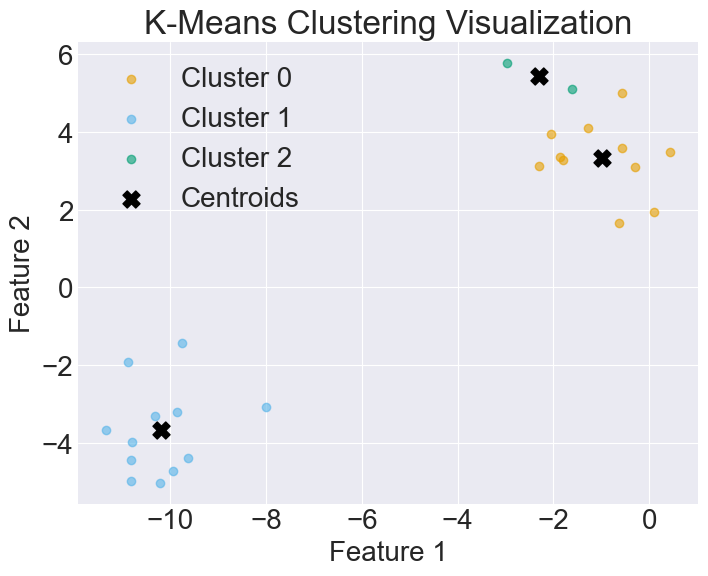

In [23]:
# YOUR CODE HERE
import kmeans
import numpy as np

# Load the dataset
data = np.loadtxt('data/cluster2.csv', delimiter=',', skiprows=1)  # Skip header if needed

# Choose a reasonable k (try k=3 or k=4)
k = 3  

# Create and run K-means clustering
cluster = kmeans.KMeans(data)
cluster.cluster(k)

# Plot the clusters
cluster.plot_clusters()

### 1c. Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset.

1. Implement `elbow_plot` in `kmeans.py`.
2. Create an elbow plot below for the `cluster2` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

Your plot should show a clear plateau, starting at the number of visual clusters.

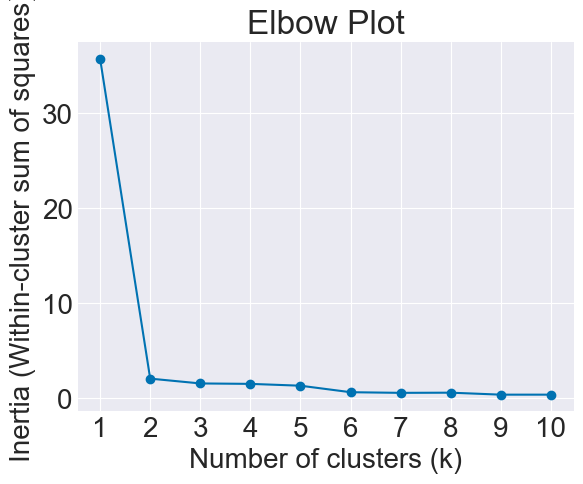

In [26]:
# YOUR CODE HERE

# Create KMeans instance
cluster = kmeans.KMeans(data)

# Generate elbow plot with a max k (you can choose 10 or any reasonable number)
cluster.elbow_plot(10)

### 1d. Clustering the `cluster5` dataset

Load in the `cluster5` dataset then in the cell below:
1. create a scatter plot showing the 2D dataset (without any clustering).
2. run K-means to cluster the dataset with a reasonable number of clusters (based on what you observe in the scatter plot).
3. create a scatter plot showing the clustered data.

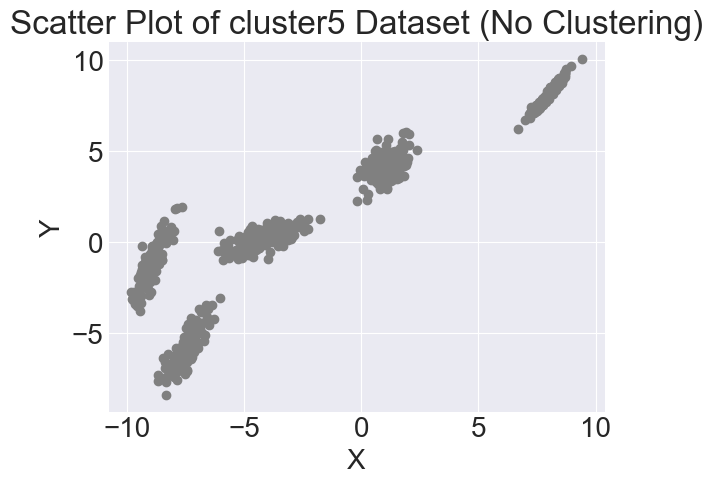

In [27]:
# YOUR CODE HERE
# Load the cluster5 dataset
data_cluster5 = np.loadtxt('data/cluster5.csv', delimiter=',', skiprows=1)  # Skip header if necessary

# Scatter plot of the data without clustering
plt.scatter(data_cluster5[:, 0], data_cluster5[:, 1], color='gray', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of cluster5 Dataset (No Clustering)')
plt.grid(True)
plt.show()

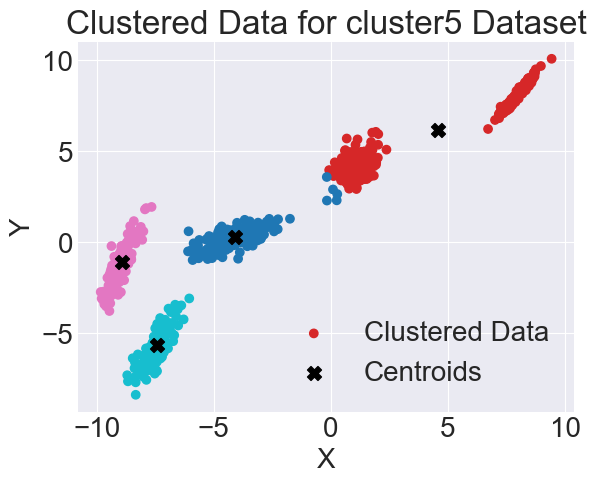

In [28]:
# YOUR CODE HERE

# Create KMeans instance and run clustering (e.g., k=4 based on visual inspection)
cluster = kmeans.KMeans(data_cluster5)
cluster.cluster(k=4)  # Change k based on your observation of the data

# Retrieve the cluster labels for each data point
labels = cluster.get_data_centroid_labels()
 # Plot the clustered data
plt.scatter(data_cluster5[:, 0], data_cluster5[:, 1], c=labels, cmap='tab10', label='Clustered Data')
plt.scatter(cluster.get_centroids()[:, 0], cluster.get_centroids()[:, 1], marker='X', color='black', s=100, label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustered Data for cluster5 Dataset')
plt.legend()
plt.grid(True)
plt.show()

### 1e. Clustering results over repeated runs of K-means

Copy-and-paste your above code to the cell below then modify the code to run K-means 5 times. Keep the random seed to ensure that you get consistent clustering results if you execute the cell multiple times. The below cell should output 5 scatter plots, each showing the clustering results from a different run of K-means.

Run 1:


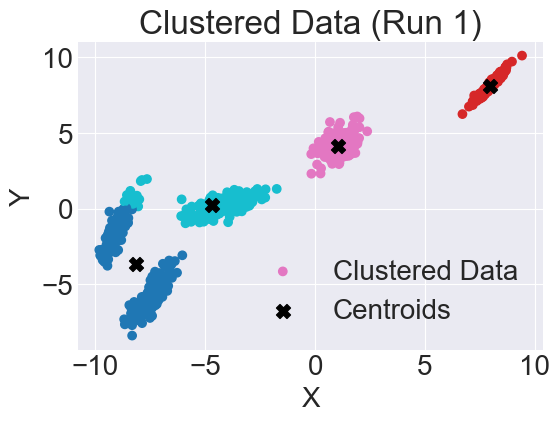

Run 2:


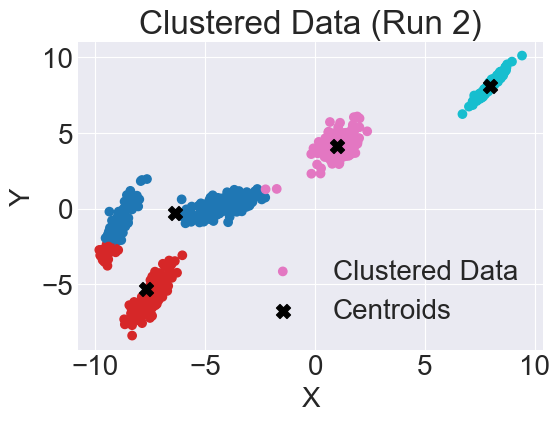

Run 3:


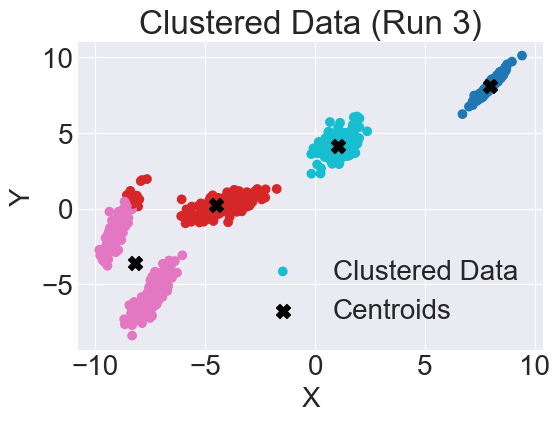

Run 4:


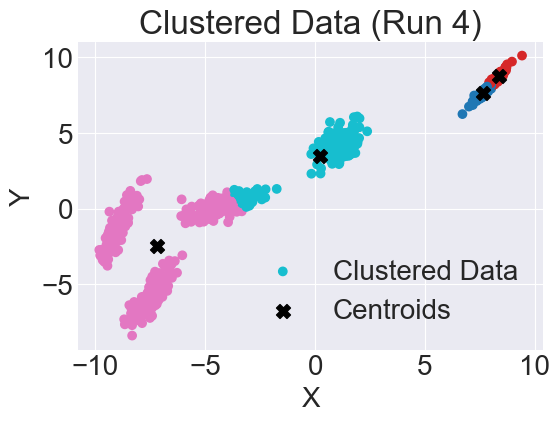

Run 5:


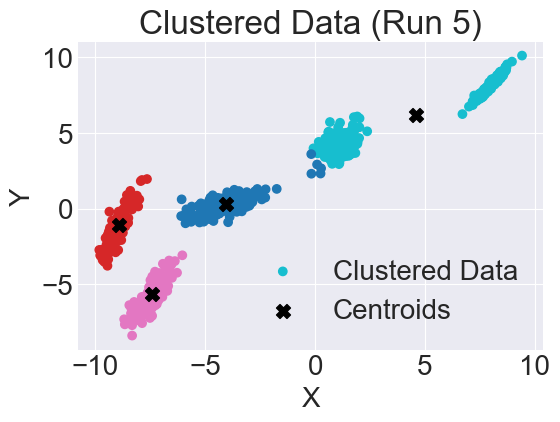

In [29]:
# YOUR CODE HERE
import random

# Set a random seed for consistency
random.seed(42)
np.random.seed(42)

# Load the cluster5 dataset
data_cluster5 = np.loadtxt('data/cluster5.csv', delimiter=',', skiprows=1)  # Skip header if necessary

# Create a KMeans instance
cluster = kmeans.KMeans(data_cluster5)

# Run K-means 5 times and plot the results
k = 4  # Number of clusters based on previous observation
for i in range(5):
    print(f"Run {i + 1}:")
    
    # Run K-means clustering
    cluster.cluster(k=k)

    # Retrieve the cluster labels for each data point
    labels = cluster.get_data_centroid_labels()

    # Plot the clustered data
    plt.figure(figsize=(6, 4))
    plt.scatter(data_cluster5[:, 0], data_cluster5[:, 1], c=labels, cmap='tab10', label='Clustered Data')
    plt.scatter(cluster.get_centroids()[:, 0], cluster.get_centroids()[:, 1], marker='X', color='black', s=100, label='Centroids')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Clustered Data (Run {i + 1})')
    plt.legend()
    plt.grid(True)
    plt.show()

### 1f. Questions

**Question 1:**  What do you observe about how the cluster assignments match up with the clusters that you see visually? **Why does this happen?**


**Answer 1:** 

the K-means clustering results tend to match the visual clusters we see in the data. The algorithm groups data points based on their proximity to centroids, which usually align well with visually distinct groups in the dataset. This happens because the algorithm works by iteratively assigning each point to the nearest centroid and then adjusting the centroids based on the mean of the assigned points.

### 1g. Elbow plots over repeated runs of K-means

Copy-and-paste your above code to the cell below then modify the code to create 5 elbow plots. Each elbow plot should plot 10 values, the inertia obtained when clustering the dataset with `k` = 1, 2, ..., 10. Keep the random seed to ensure that you get consistent clustering results if you execute the cell multiple times.

NameError: name 'create_elbow_plot' is not defined

### 1h. Questions 

**Question 2:** If you had to only rely on the elbow plots to determine the number of clusters (without looking at the scatter plots), how many clusters do you estimate the dataset has?

**Answer 2:** 

YOUR ANSWER HERE

**Question 3:** How predictive is the elbow plot of the number of visual clusters in the dataset?

**Answer 3:**

YOUR ANSWER HERE

### 1i. Run K-means multiple times, save the best clustering

To address what you observed above, we can run K-means multiple times and take the best results to determine the final clustering. Implement `cluster_batch` to run K-means multiple times with a chosen $k$ value.

In the cell below, run `cluster_batch` with 10 iterations for the `k` value you identified in Task 1e above. Make a new scatterplot of the cluster assignments.

C:\Users\PC\AppData\Local\Temp\ipykernel_13400\1137400946.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='tab10', marker='o', s=50)  # Color by cluster label


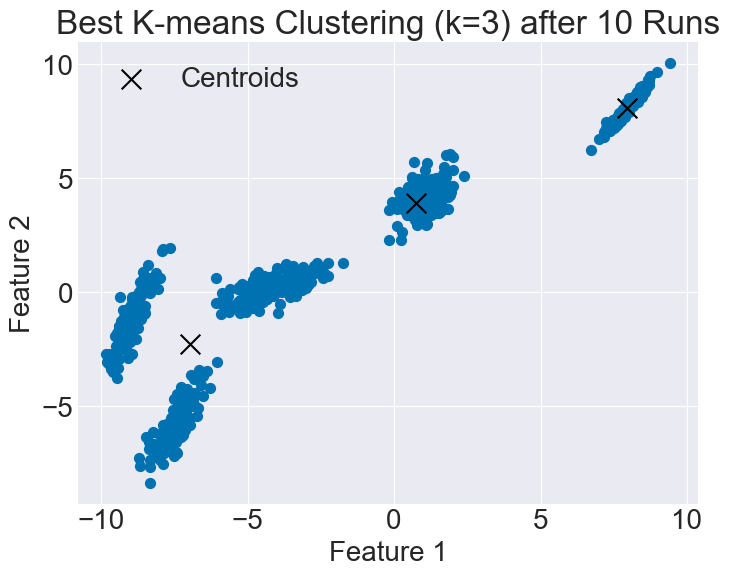

In [39]:
# YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt
from kmeans import KMeans  # Assuming your KMeans class is in kmeans.py

def cluster_batch(data, k, n_runs=10, random_seed=42):
    best_inertia = float('inf')  # Start with an infinitely large inertia value
    best_labels = None  # Store the best cluster labels
    best_centroids = None  # Store the best centroids
    
    np.random.seed(random_seed)  # Set the random seed to ensure reproducibility
    
    # Run K-means n_runs times and find the best clustering
    for run in range(n_runs):
        kmeans = KMeans(data)
        kmeans.cluster(k)  # Run K-means with k clusters
        inertia = kmeans.inertia  # Get the inertia for this clustering
        
        # Update best clustering if this run gives a lower inertia
        if inertia < best_inertia:
            best_inertia = inertia
            best_labels = kmeans.labels  # Store the labels for this best clustering
            best_centroids = kmeans.centroids  # Store the centroids for this best clustering
    
    return best_labels, best_centroids
# Load the cluster5 dataset (adjust the path if necessary)
data = np.loadtxt('data/cluster5.csv', delimiter=',', skiprows=1)

# Choose k based on Task 1e, e.g., k=3 (or another value you identified)
k = 3  # You can adjust k based on your previous analysis

# Run cluster_batch to get the best clustering
best_labels, best_centroids = cluster_batch(data, k, n_runs=10)

# Create a scatter plot showing the best clustering result
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='tab10', marker='o', s=50)  # Color by cluster label
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='black', marker='x', s=200, label='Centroids')  # Plot centroids
plt.title(f'Best K-means Clustering (k={k}) after 10 Runs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### 1j. Questions

**Question 4:** Based on the clustered results above, in way ways (if any) did the clustering improve compared with what you found in Task 1e? **Why?**

**Answer 4:**

In Task 1e, K-means was run once, and because K-means uses random initialization for centroids, the results may vary across runs. This randomness can sometimes lead to suboptimal clustering, especially if the centroids are initialized poorly.

### 1k. Update elbow plot for the `cluster5` dataset

Now that you have experimented with `cluster` and `cluster_batch`, update your `elbow_plot` method to use `cluster_batch` instead of `cluster`. To do this, add a keyword argument `n_iter` to `elbow_plot`. Give it a default value of 1. (*And don't forget to update the docstring to include the new parameter!*)

In the cell below, test out your updated `elbow_plot` method using the same max $k$ value and number of iterations (for each $k$ value) as you used above. Create an elbow plot showing the inertia with different $k$ values.

In [ ]:
# YOUR CODE HERE

### 1l. Questions

**Question 5:** Run the above cell several times and examine the resulting elbow plot. How predictive and reliable is the updated elbow plot of the number of clusters in the dataset compared to the previous ones that you made?

**Answer 5:** 

YOUR ANSWER HERE